# Compare Data/MC 
The sector difference is huge, in this notebook I try to explore the distributions of data/mc to see if there is any obvious problem.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/davidriser/Data/kaon/kaon.csv.gzip', 
                   compression='gzip', nrows=100000)
data.head()

,Unnamed: 0,alpha,dist_cc,dist_cc_theta,dist_dcr1,dist_dcr3,dist_ec_edep,dist_ecsf,dist_ecu,dist_ecv,...,phi_mes,pt,q2,sector,theta_ele,theta_h,theta_mes,w,x,z
0,0,0.143933,-0.463867,0.323455,0.253359,-0.224640,-0.915233,-0.376701,-0.008956,0.668288,...,22.815607,0.652284,1.675322,4,38.140896,125.040291,44.636944,2.860639,0.186598,0.244322
1,1,0.901876,-0.907602,-0.127589,-0.587851,-0.869552,-0.373312,0.282386,-0.683514,0.907209,...,-126.740021,0.734446,1.210822,2,22.945086,63.091068,23.400002,2.715655,0.157142,0.611070
2,2,0.139293,-0.965473,0.042414,-0.717811,-0.889251,-0.057649,1.415707,-0.974058,0.934541,...,-56.626099,0.052899,1.297145,3,16.803860,102.034019,11.457237,2.171623,0.252720,0.294747
3,3,0.768567,-0.823863,-0.067434,-0.755561,-0.782944,-0.313762,-0.212511,-0.449581,0.845762,...,-119.980103,0.202439,2.408368,2,24.146276,27.091259,7.603323,2.022837,0.428544,0.607660
4,4,0.328880,-0.477200,0.440067,0.326013,-0.180585,-0.888324,-0.064384,-0.098194,0.489792,...,84.715561,0.281373,1.485125,6,37.571716,139.654678,34.250034,2.913845,0.163285,0.158032


In [3]:
mc = pd.read_csv('/Users/davidriser/Data/kaon/kaon_gen_asym.csv.gzip', 
                 compression='gzip', nrows=100000)
mc.head()

,alpha,dvz,eta,helicity,meson_id,missing_mass,p_ele,p_mes,phi_ele,phi_h,phi_mes,pt,q2,sector,theta_ele,theta_h,theta_mes,w,x,z
0,1.0,5.490196,0.389770,-1,321,1.794040,1.520104,1.409018,-130.035751,-62.859810,73.726372,0.099763,2.820363,5,33.770233,26.360289,10.050827,2.350466,0.377827,0.375323
1,1.0,0.045776,0.947852,1,321,1.118437,2.614481,2.493782,123.161285,152.714767,-64.249527,0.374457,1.090683,3,15.833797,28.865963,18.035357,2.280509,0.201566,0.881623
2,1.0,-1.062027,-0.742895,1,321,1.114240,2.616159,0.609751,-57.268417,126.527710,78.975266,0.381509,1.934765,6,21.132347,143.056671,58.881550,2.086502,0.357766,0.272236
3,1.0,-3.860535,0.732169,-1,321,1.023583,2.834363,2.203250,-111.376930,92.992569,38.389793,0.436122,1.576239,5,18.300943,39.632915,20.762295,2.074258,0.315347,0.847668
4,1.0,-1.879906,1.163061,1,321,1.115254,1.826352,3.298085,-6.610338,165.650513,170.471603,0.319687,1.666461,1,23.506296,20.631498,13.459214,2.470608,0.241866,0.908265


In [4]:
def plot_compare_axis(data, mc, bins, axis='x'):
    fig = plt.figure(figsize=(18,8))
    index = 1 
    for mc_sect, data_sect in zip(mc.groupby('sector'), data.groupby('sector')):
        ax = fig.add_subplot(2,3,index)
        ax.hist(data_sect[1][axis], bins=bins, 
                edgecolor='k', color='red', alpha=0.6, density=True)
        ax.hist(mc_sect[1][axis], bins=bins, 
                edgecolor='k', color='blue', alpha=0.6, density=True)
        ax.set_title(f'Sector {mc_sect[0]}')
        ax.grid(alpha=0.2)
        index += 1
    return fig 

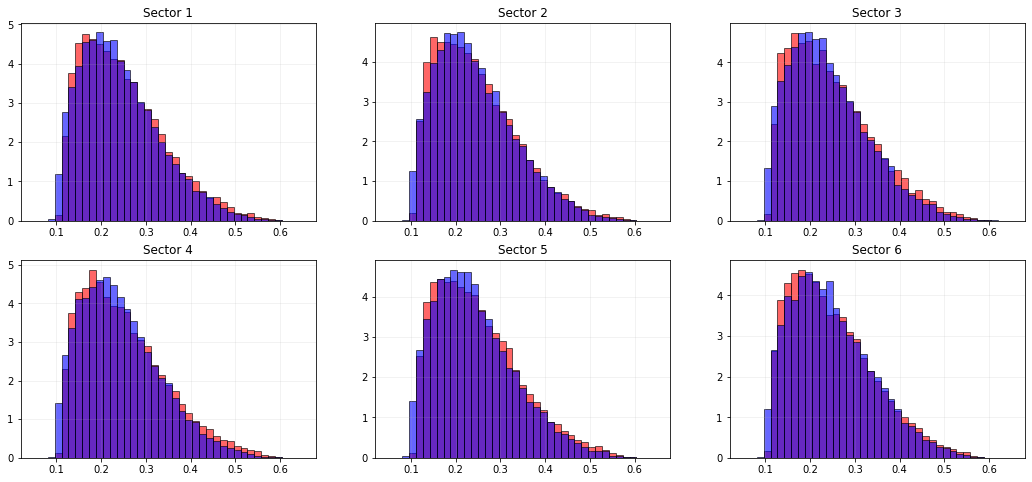

In [5]:
fig = plot_compare_axis(data, mc, np.linspace(0.05, 0.65, 40), 'x')
fig.savefig('image/mc/x.pdf', bbox_inches='tight')

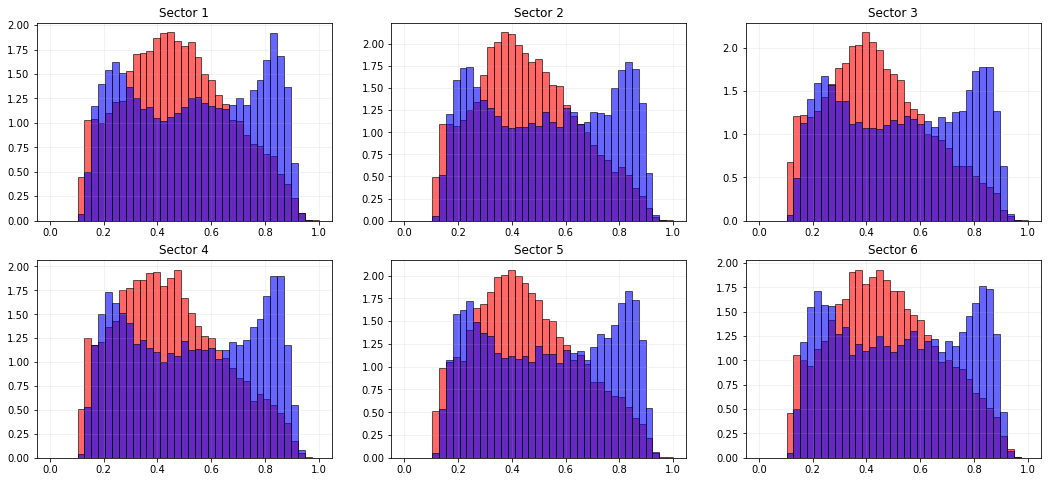

In [6]:
fig = plot_compare_axis(data, mc, np.linspace(0.0, 1.0, 40), 'z')
fig.savefig('image/mc/z.pdf', bbox_inches='tight')

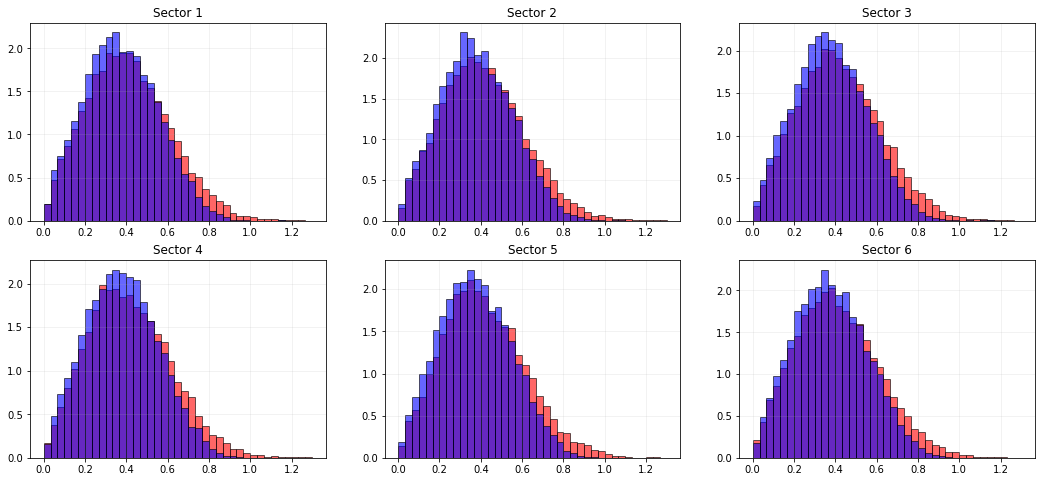

In [7]:
fig = plot_compare_axis(data, mc, np.linspace(0.0, 1.3, 40), 'pt')
fig.savefig('image/mc/pt.pdf', bbox_inches='tight')

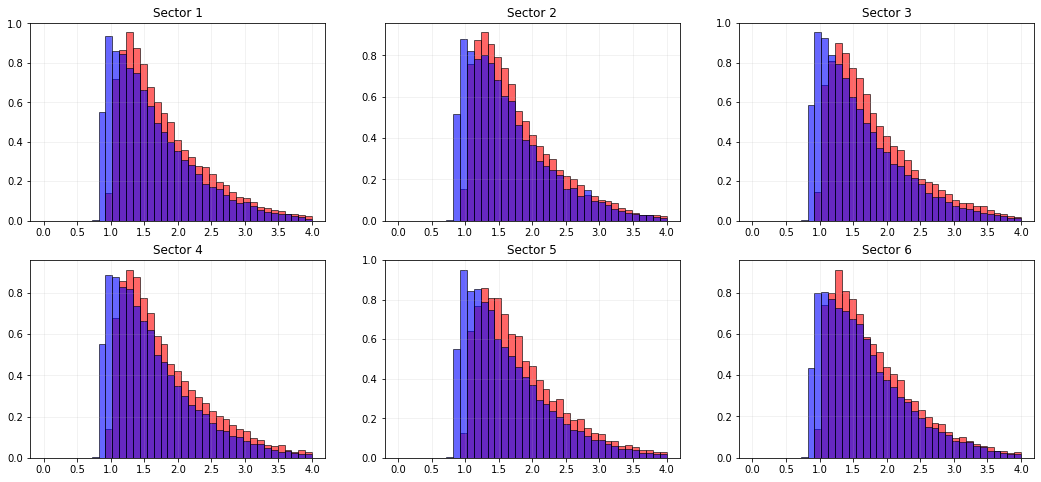

In [8]:
fig = plot_compare_axis(data, mc, np.linspace(0.0, 4.0, 40), 'q2')
fig.savefig('image/mc/q2.pdf', bbox_inches='tight')

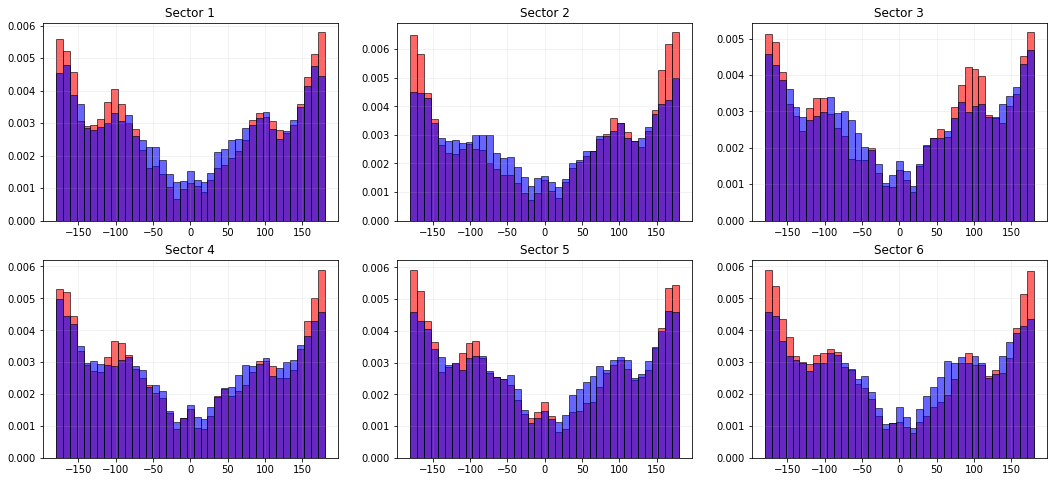

In [9]:
fig = plot_compare_axis(data, mc, np.linspace(-180, 180, 40), 'phi_h')

There are some significant differences in the one dimensional distributions of variables between data/mc.  The `z` distribution from MC looks very strange.  Let's have a look at the `z` vs. `pt` spectrum.

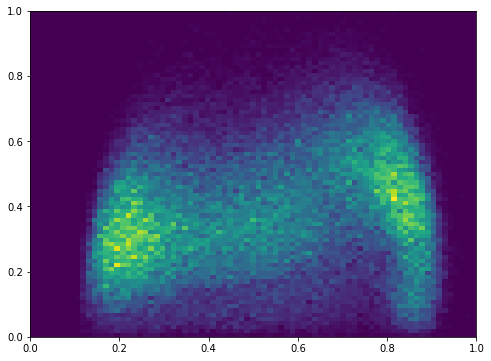

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist2d(mc['z'], mc['pt'], 
          bins=(np.linspace(0.0, 1.0, 80), np.linspace(0.0, 1.0, 80)));
fig.savefig('image/mc/zpt.pdf', bbox_inches='tight')

Is the PID okay? I don't have the TOF $\beta$ to check.  Let's see what data looks like.

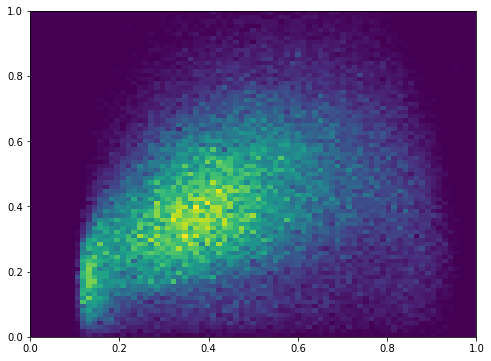

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist2d(data['z'], data['pt'], 
          bins=(np.linspace(0.0, 1.0, 80), np.linspace(0.0, 1.0, 80))); 

What part of phase space to do lose by cutting on momentum? 

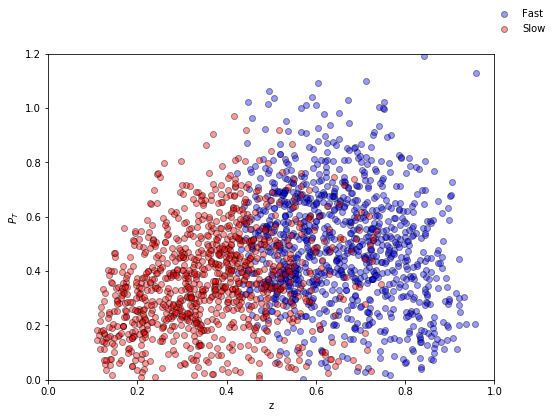

In [25]:
fast = data[data['p_mes'] > 2][:1000]
slow = data[data['p_mes'] < 2][:1000]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(fast['z'], fast['pt'], 
           color='blue', edgecolor='k', alpha=0.4, label='Fast')
ax.scatter(slow['z'], slow['pt'], 
           color='red', edgecolor='k', alpha=0.4, label='Slow')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.2])
ax.set_xlabel('z')
ax.set_ylabel('$P_T$')
fig.legend(frameon=False)

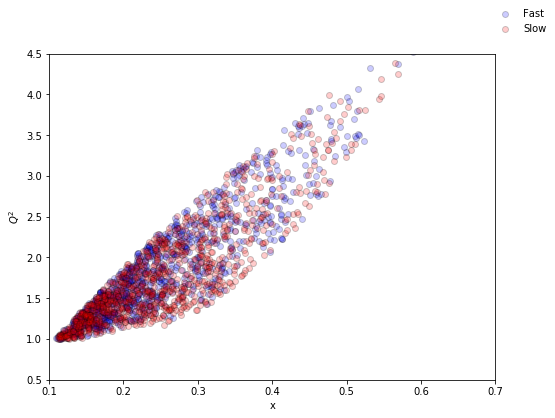

In [34]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(fast['x'], fast['q2'], 
           color='blue', edgecolor='k', alpha=0.2, label='Fast')
ax.scatter(slow['x'], slow['q2'], 
           color='red', edgecolor='k', alpha=0.2, label='Slow')
ax.set_xlim([0.1, 0.7])
ax.set_ylim([0.5, 4.5])
ax.set_xlabel('x')
ax.set_ylabel('$Q^2$')
fig.legend(frameon=False)

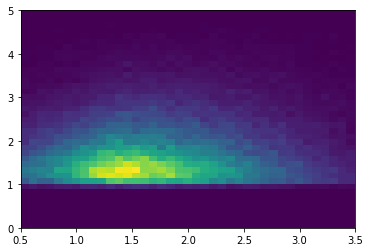

In [33]:
plt.hist2d(data['p_mes'], data['q2'], 
           bins=(np.linspace(0.5,3.5,40), np.linspace(0,5,40)));